# Testing the method and the timing of the Scaling

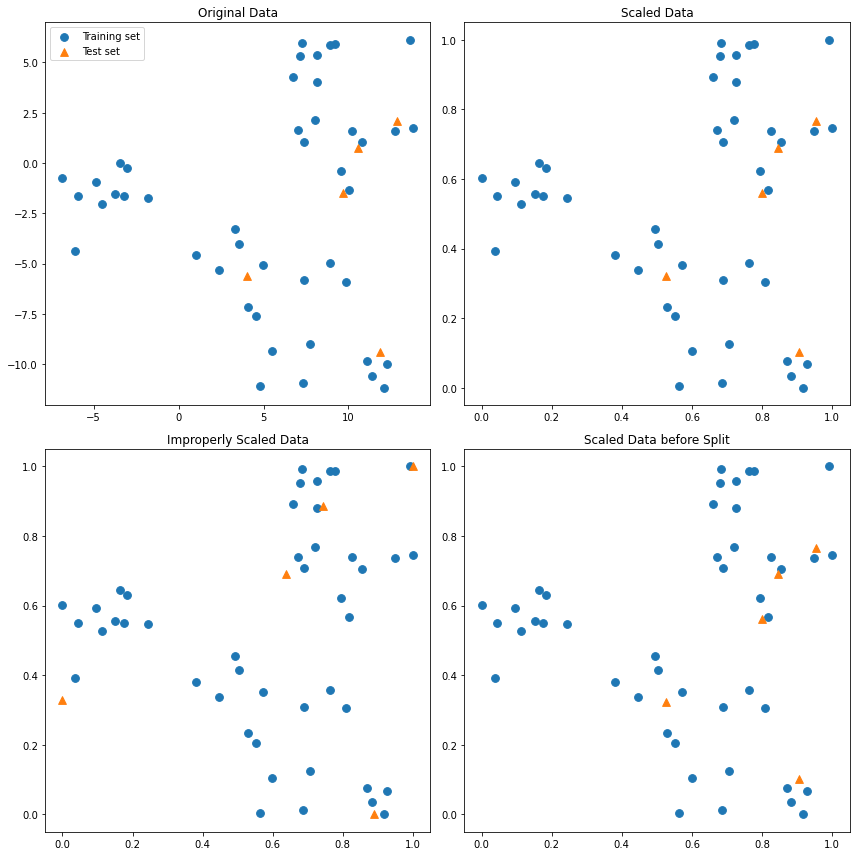

In [8]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].scatter(X_train[:, 0], X_train[:, 1], label="Training set", s=60)
axes[0,0].scatter(X_test[:, 0], X_test[:, 1], marker='^', label="Test set", s=60)
axes[0,0].legend(loc='upper left')
axes[0,0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[0,1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="Training set", s=60)
axes[0,1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', label="Test set", s=60)
axes[0,1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[1,0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="training set", s=60)
axes[1,0].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', label="test set", s=60)
axes[1,0].set_title("Improperly Scaled Data")

# Scale X before split
new_scaler = MinMaxScaler()
new_scaler.fit(X)
scaled_X = new_scaler.transform(X)

# Split the data
X_train_2, X_test_2 = train_test_split(scaled_X, random_state=5, test_size=.1)

axes[1,1].scatter(X_train_2[:, 0], X_train_2[:, 1], label="Training set", s=60)
axes[1,1].scatter(X_test_2[:, 0], X_test_2[:, 1], marker='^', label="Test set", s=60)
axes[1,1].set_title("Scaled Data before Split")

fig.tight_layout()